Índice

- [Couting Sort](#Couting-Sort)
    - [Questão 3-A](#Questão-3-A)
- [Bucket Sort](#Bucket-Sort)
    - [Questão 3-B](#Questão-3-B)

In [1]:
import timeit
import matplotlib.pyplot as plt
from numpy import *

# Couting Sort

In [2]:
def couting_sort(A,B,n,k):
    C = []
    for i in range(0,k+1):
        C.append(0)
    for j in range(0,n):
        C[A[j]] = C[A[j]] + 1
    for i in range(1,k+1):
        C[i] = C[i] + C[i - 1]
    for j in range(n-1,-1,-1):
        B[C[A[j]]-1] = A[j]
        C[A[j]] = C[A[j]] - 1

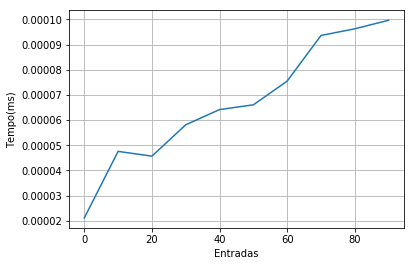

In [65]:
#Teste de entradas até 91 valores
tempo = []
for y in range(0,100,10):#Entradas aumentam gradativamente de 10 em 10
    A = random.randint(0,50,size=y+1)
    B = len(A)*[0]
    k = max(A)
    inicio = timeit.default_timer()
    couting_sort(A,B,len(A),k)
    final = timeit.default_timer()
    tempo.append(final - inicio)
x = arange(0,100,10)
plt.plot(x,tempo)
plt.xlabel("Entradas")
plt.ylabel("Tempo(ms)")
plt.grid(True)
plt.show()

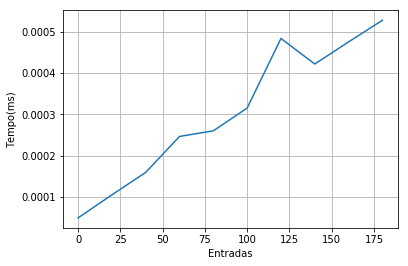

In [71]:
#Teste de entradas até 181
tempo2 = []
for y in range(0,200,20):#Entradas aumentam gradativamente de 20 em 20
    A = random.randint(0,50,size=y+1)
    B = len(A)*[0]
    k = max(A)
    inicio = timeit.default_timer()
    couting_sort(A,B,len(A),k)
    final = timeit.default_timer()
    tempo2.append(final - inicio)
x = arange(0,200,20)
plt.plot(x,tempo2)
plt.xlabel("Entradas")
plt.ylabel("Tempo(ms)")
plt.grid(True)
plt.show()

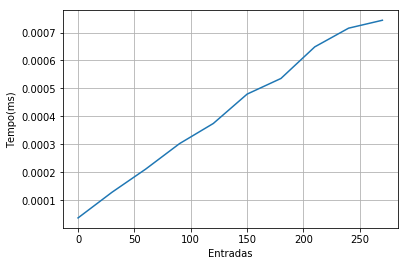

In [44]:
#Teste de entradas  até 271
tempo3 = []
for y in range(0,300,30):#Entradas aumentam gradativamente de 30 em 30
    A = random.randint(0,50,size=y+1)
    B = len(A)*[0]
    k = max(A)
    inicio = timeit.default_timer()
    couting_sort(A,B,len(A),k)
    final = timeit.default_timer()
    tempo3.append(final - inicio)
x = arange(0,300,30)
plt.plot(x,tempo3)
plt.xlabel("Entradas")
plt.ylabel("Tempo(ms)")
plt.grid(True)
plt.show()

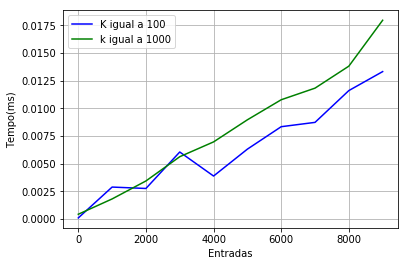

In [81]:
#Teste com valor de k grande
tempo = []
tempo2 = []
for y in range(0,10000,1000):
    A = random.randint(0,100,size=y+1)
    A[len(A)-1] = 100
    B = len(A)*[0]
    k = max(A)
    inicio = timeit.default_timer()
    couting_sort(A,B,len(A),k)
    final = timeit.default_timer()
    tempo.append(final - inicio)
for y in range(0,10000,1000):
    A = random.randint(0,1000,size=y+1)
    A[len(A)-1] = 1000
    B = len(A)*[0]
    k = max(A)
    inicio = timeit.default_timer()
    couting_sort(A,B,len(A),k)
    final = timeit.default_timer()
    tempo2.append(final - inicio)
x = arange(0,10000,1000)
plt.plot(x,tempo, 'b')
plt.plot(x,tempo2, 'g')
plt.xlabel("Entradas")
plt.ylabel("Tempo(ms)")
plt.legend(['K igual a 100','k igual a 1000'])
plt.grid(True)
plt.show()

# Questão 3-A

# Analise o comportamento do tempo de execução do algoritmo CountingSort quando o número de elementos da sequência de entrada é aumentado gradativamente. Durante a análise, comente a relação que existe entre o tamanho da sequência de entrada e o elemento de maior valor nessa sequência. Usando dados reais, ilustre graficamente suas conclusões.

R = Como podemos ver no 1º gráfico, referente a 100 execuções com entradas aumentando em 10 a cada uma, o gráfico fica muito variante em picos baixos e altos. Em certos pontos, com entradas menores, o tempo atingido é superior a uma entrada maior. Já no 2º gráfico, onde a entrada chega a 181 valores em 200 execuções aumentando de 20 em 20, podemos ver um gráfico mais linear, com poucas variações de entradas menores com tempo mais alto que entradas maiores. No 3º, onde possui 300 execuções com entradas de até 271(aumento de 30 em 30) já se apresenta de forma bem mais linear. O maior valor de uma sequência pode ser um causador dessas variações, pois quanto maior a constante k(referente ao maior valor da entrada) maior será o vetor auxiliar, o que acaba afetando no desempenho de tempo do algoritmo, como pode ser visto no 4º gráfico onde foi feito teste com o k valendo 100 e 1000, ou seja, gerando vetores auxiliares de 101 e 1001 posições respectivamente.

# Bucket Sort

In [50]:
def bucket_sort(lista):
    largest = max(lista)
    length = len(lista)
    size = largest/length
 
    buckets = [[] for _ in range(length)]
    for i in range(length):
        j = int(lista[i]/size)
        if j != length:
            buckets[j].append(lista[i])
        else:
            buckets[length - 1].append(lista[i])
 
    for i in range(length):
        insertion_sort(buckets[i])
 
    result = []
    for i in range(length):
        result = result + buckets[i]
 
    return result
def insertion_sort(lista):
    for i in range(1, len(lista)):
        temp = lista[i]
        j = i - 1
        while (j >= 0 and temp < lista[j]):
            lista[j + 1] = lista[j]
            j = j - 1
        lista[j + 1] = temp

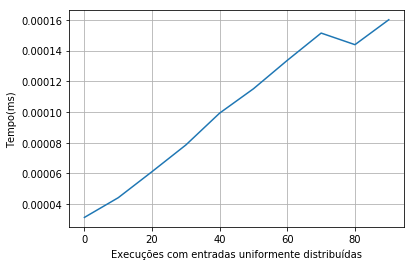

In [52]:
#100 execuções com entrada de 100 valores uniformemente distribuídos
tempo = []
for j in range(0,100,10):
    A = random.uniform(0,100,size=j+1)
    inicio = timeit.default_timer()
    bucket_sort(A)
    final = timeit.default_timer()
    tempo.append(final - inicio)
x = arange(0,100,10)
plt.plot(x,tempo)
plt.xlabel("Execuções com entradas uniformente distribuídas")
plt.ylabel("Tempo(ms)")
plt.grid(True)
plt.show()

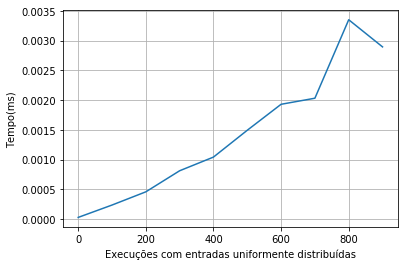

In [63]:
#1000 execuções com entrada de 1000 valores uniformemente distribuídos
tempo2 = []
for j in range(0,1000,100):
    A = random.uniform(0,100,size=j+1)
    inicio = timeit.default_timer()
    bucket_sort(A)
    final = timeit.default_timer()
    tempo2.append(final - inicio)
x = arange(0,1000,100)
plt.plot(x,tempo2)
plt.xlabel("Execuções com entradas uniformente distribuídas")
plt.ylabel("Tempo(ms)")
plt.grid(True)
plt.show()

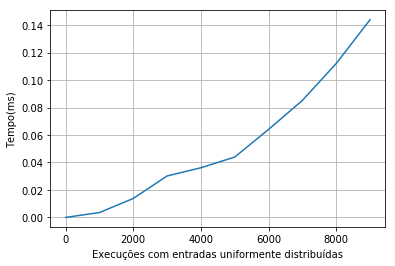

In [60]:
#10000 execuções com entrada de 10000 valores uniformemente distribuídos
tempo3 = []
for j in range(0,10000,1000):
    A = random.uniform(0,100,size=j+1)
    inicio = timeit.default_timer()
    bucket_sort(A)
    final = timeit.default_timer()
    tempo3.append(final - inicio)
x = arange(0,10000,1000)
plt.plot(x,tempo3)
plt.xlabel("Execuções com entradas uniformente distribuídas")
plt.ylabel("Tempo(ms)")
plt.grid(True)
plt.show()

# Questão 3-B

# Compare o tempo de execução do algoritmo BucketSort quando o mesmo recebe como entrada sequências uniformemente distribuídas. Caso mais números fossem inseridos nas sequências, como o desempenho do algoritmo seria afetado? Usando dados reais, ilustre graficamente suas conclusões.

R = 